# Welcome back :)

![](https://media.giphy.com/media/8vIFoKU8s4m4CBqCao/giphy.gif)

# O nosso modelo _realmente_ é bom?

Vimos nos ultimos tópicos como criamos um modelo de Machine Learning, como verificamos suas métricas e vemos se ele é bom. Contúdo, nossa maior motivação é **criar** modelos que generalizem para dados **nunca** vistos anteriormente. E como sabemos se o nosso modelo está **generalizando** adequadamente?

## Generalização

In [1]:
from IPython.display import YouTubeVideo

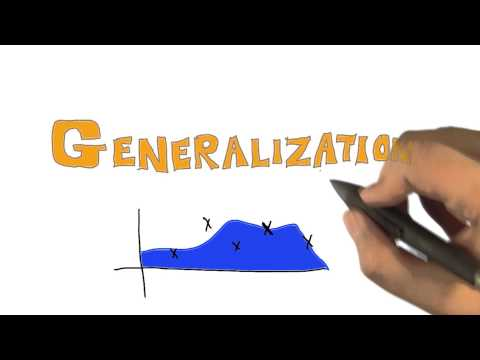

In [2]:
YouTubeVideo('lAKL7dCcBqk', end=72)

Com base no que viram **o que é generalization** em MachineLearning?

## Overfitting e Underfitting

A ideia de construir um modelo que **generalize** é refletida no que podemos definir pela ideia de *overfitting* e *underfitting*. Com isso podemos responder as seguintes perguntas:

- O modelo pode ser simplifcado? Ou deve ser mais complexo?
- Podemos adicionar mais features?
- Precisamos de mais dados?


![](../imgs/underfit-over.png)

>We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data.


[Source](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)


Em outras palavras, quando falamos de overfitting e underfitting estão associados **com os erros** que nosso modelo tem. Mas como medimos isso?

# Train Validation Test


Essas três palavras mágicas vão te seguir por toda a sua jornada do mundo de Machine Learning. Basicamente queremos sempre dividir nossos dados em três:

- Amostra de Treino (Onde treinamos nosso modelo, com a maior parte do dado)
- Amostra de Validação (Para evitar overfitting, temos uma amostra para validar os hiperparâmetos do modelo, como learning_rate)
- Amostra de Teste (Uma amostra em que não criamos influência nenhuma e evitamos ver ao máximo possível)

Geralmente a proporção de dados em cada um depende do dado, mas é comum usarmos 0.8 pra treino, 0.1 pra validação e 0.1 pra teste. Vamos a um exemplo, retomando os dados que estamos acostumados


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')



from matplotlib import pyplot as plt
import seaborn as sns
# Graphics in SVG format are more sharp and legible
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
DATAPATH = '../data'

def obtain_metrics(y_true, y_pred):
    print(f"R2 do Modelo: {r2_score(y_true, y_pred)}")
    print(f"MSE do Modelo: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE do Modelo: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    
data = pd.read_csv(f'{DATAPATH}/house-prices.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


O sklearn dispõe da função `train_test_split` em que podemos separar os nossos dados adequadamente

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
features = list(set(data.columns) - set(['SalePrice']))
target = ['SalePrice']

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    data[features], data[target], train_size=0.8, random_state=42
)  # reproducibilidade

In [7]:
X_train.shape

(1168, 79)

In [8]:
X_val.shape

(292, 79)

In [9]:
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, train_size=0.5, random_state=42
)  # reproducibilidade

In [10]:
X_train.shape, X_val.shape, X_test.shape

((1168, 79), (146, 79), (146, 79))

In [11]:
features = ['LotArea', 'GrLivArea', 'GarageCars', 'LotFrontage', 'YearBuilt']

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr =  LinearRegression()

lr.fit(X_train[features].fillna(X_train[features].mean()), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
obtain_metrics(
    y_train,
    lr.predict(X_train[features].fillna(X_train[features].mean())),
)

R2 do Modelo: 0.6854347879951247
MSE do Modelo: 1876240054.7262666
RMSE do Modelo: 43315.58674110587


In [15]:
obtain_metrics(
    y_val,
    lr.predict(X_val[features].fillna(X_train[features].mean())), 
    #NUNCA USAMOS DADOS DE VALIDACAO OU TESTE PRA INFERIR
)

R2 do Modelo: 0.7340572931387517
MSE do Modelo: 1558073679.7099292
RMSE do Modelo: 39472.44202871073


In [16]:
obtain_metrics(
    y_test,
    lr.predict(X_test[features].fillna(X_train[features].mean())), 
    #NUNCA USAMOS DADOS DE VALIDACAO OU TESTE PRA INFERIR
)

R2 do Modelo: 0.6907057549173587
MSE do Modelo: 2910140014.61692
RMSE do Modelo: 53945.71358891195


Esses valores foram relativamente próximos, o que indica que não existe overfitting do modelo. Se a diferença entre treino e teste fosse muito intensa, estaríamos vendo um caso de overfitting!

![](../imgs/chihuahuas-and-muffins.jpeg)

## Um pouco mais de Robustez

Se não estamos trabalhando com dados muito pesados, uma ideia mais **poderosa** do que só separar os dados uma única vez, é repetir esse processo um número $k$ de vezes e tirar a média. Essa é a ideia por trás do Cross Validation, que também é usada para evitar Overfitting!

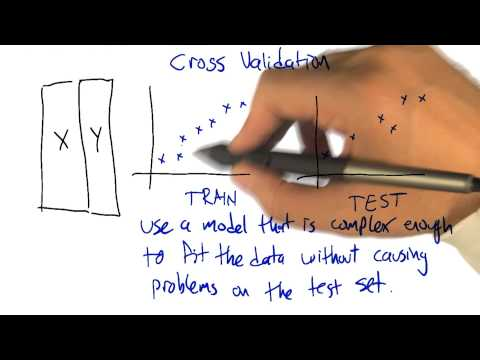

In [17]:
YouTubeVideo('sFO2ff-gTh0')

Resumindo em uma imagem:

<img src="../imgs/grid_search_cross_validation.png" width="800"/>


Então vamos isolar o nosso X_test, y_test isolados, mas vamos reunir o X_train e o X_val :)

In [18]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
mean_ = X_train[features].mean()

In [21]:
scores = cross_val_score(lr, X_train[features].fillna(mean_), y_train, cv=5, scoring='r2')

In [22]:
scores.mean()

0.6608290767894065

In [23]:
r2_score(y_test, lr.predict(X_test[features].fillna(mean_)))

0.6907054993080473

Logo, não estamos overfitando nem underfitando :)

# Validando Graficamente

## Learning Curves
Traduzido [daqui](https://mlcourse.ai/articles/topic4-part5-validation/)

> Quantos mais dados o modelo usar, melhor. Mas como que entedemos se novos dados serão uteis para uma dada situação? Por exemplo, vale investir $N$ pessoas para dobrar o dataset?

> Uma vez que adquirir novos dados pode ser inviável, vale  a pena variar o tamanho dos dados de treinamento e ver como a qualidade da solução depende da quantidade de treinamento. Essa é a ideia por trás de Learning Curves

> A ideia é simples: nós plotamos o erro como uma função em relação aos exemplos dos dados de treinamento, fixando os parâmetos do modelo


Retirado [daqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [24]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="r2"
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/abarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/matplotlib/pyplot.py'>

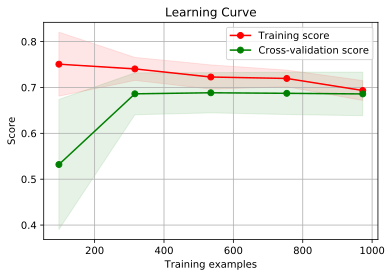

In [25]:
plot_learning_curve(
    estimator=lr,
    title="Learning Curve",
    X=data[features].fillna(data[features].mean()),
    y=data[target],
)

## Bias-Variance Tradeoff
Basicamente, se **as duas curvas estiverem próximas**, nosso modelo está sofrendo de **High Bias** e, então, aumentar o número de dados de treinamento talvez não ajude muito. Caso haja uma distância entre os dois, então aumentar o número de dados de treinamento pode ajudar, uma vez que o modelo está sofrendo de **High variance**

<img src="../imgs/bias-variance-tradeoff.png" width="400"/>


Problemas de **bias** ocorrem quando ocorre uma "super simplificação" dos nossos dados. Um exemplo, seria se tivessemos um modelo **que sempre prevê a média**. Ou seja, o modelo é tão simplificado que ele não consegue fitar os dados direito e, então, estão associados a **underfitting**.


Problemas de **variance** ocorrem quando ocorre uma "super complexidade" dos nossos dados. Colocamos tantas features que temos mais features do que número de dados e o grau de complexidade é tão alto que a **generalização** é ruim uma vez que ele decora os dados de treino, ele **overfitta**


Queremos sempre um modelo que consiga **fitar o conjunto de dados** e **mas generalize bem**. Em outras palavras, buscamos um equilíbrio entre bias e o variance do modelo!

# Concluindo a Regressão

Eba! Agora vocês aprenderam **o que importa** no ponta a ponta de um processo de Machine Learning. Métricas, Validação, Feature Engineering. Agora que tal explorarmos outro tipo de *problema*

# Mudando a forma de pensar nos dados


Suponha que ao invés de tentar prever o **preço** de uma casa, nós queremos prever se uma dada casa será cara ou barata.

In [26]:
data = pd.read_csv('../data/house-classes.csv', index_col=0)

In [27]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ClassPrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Expensive
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Expensive
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Expensive
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Cheap
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Expensive


In [28]:
features = ['OverallQual', 'GrLivArea']
target = 'ClassPrice'

In [29]:
data[target].value_counts()

Cheap        732
Expensive    728
Name: ClassPrice, dtype: int64

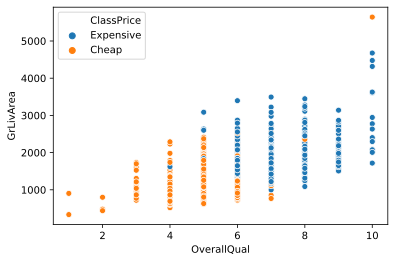

In [30]:
_ = sns.scatterplot(data[features[0]], data[features[1]], hue=data[target])

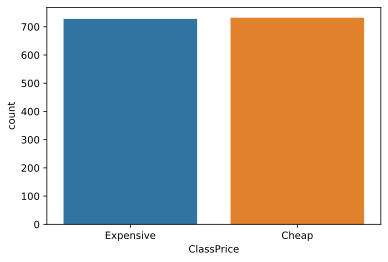

In [31]:
sns.countplot(data[target]);

Temos a mesma quantidade de labels entre os nossos dados e, com base no que vimos acima, queremos um modelo que **defina uma boa fronteira de decisão dos nossos dados**

Em outras palavras, dado o seguinte conjunto de dados:

![](../imgs/decision-boundary-0.png)

Queremos defnir um modelo que consiga "separar" bem cada um dos casos


![](../imgs/decision-boundary-1.png)


Esse tipo de problema é conhecido como problema de **Classificação** e junto com a **Regressão** compõe os dois tipos de aprendizado surpervisionado existentes

Vamos considerar o seguinte problema: queremos classificar um modelo cuja saída pode ser $0$ ou $1$. No nosso caso, faremos "Cheap" representar $0$ e "Expensive", $1$.



In [32]:
data[target] = data[target].map({"Cheap": 0, "Expensive": 1})

## De volta à regressão linear


Uma forma de classificar esses dados é fazer uma **transformação não linear** em um **modelo linear** de forma que nossa variável resposta tenha o valor desejado. Relembrando a OLS:
$f(x) = w^Tx$

Uma função não linear bem famosa é a **sigmoide**, definida como $sign()$. No nosso caso então, queremos encontrar a reta de regressão linear e aplicar a sigmoide no resultado. Em outras palavras, para uma função $g(x)$ que representa o nosso classificador, ele é obtido por:

$g(x) = sign(w^Tx)$ ou

$g(x) = sign(w_0 + w_1x_{1i}+w_2{x_2i}+\dots+w_mx_{mi})$


Essa função é conhecida como **regressão logística** que, apesar de ter regressão no nome, é um classificador

### Por quê sigmoid?

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import jax.numpy as np

In [2]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

/home/andrebarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


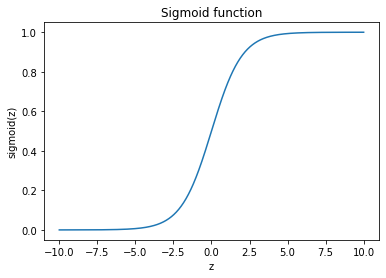

In [3]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigmoid(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function');

Ou seja, como seus valores variam entre 0 e 1, podemos interpretar ela como a **probabilidade** de uma instância $x$ pertencer à classe $0$ ou à classe $1$.


Começamos, então, a resolver o problema como se fosse uma OLS tradicional, mas convertemos o resultado em um valor de probabilidade que vai de 0 a 1. Então, queremos encontrar os mesmos $w$ e $b$!

Poderíamos usar qualquer método de otimização, como o Gradient Descent ou outro otimizador, mas como conhecemos o scikit-learn, vamos direto pra ele :) 

PS: Para quem quer entender melhor a matemática por trás, [aqui](https://festline.github.io/articles/topic4-part2-logit/), [aqui](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac) e [aqui](https://matheusfacure.github.io/2017/02/25/regr-log/#implementacao) têm conteúdos muito legais :)

## A Regressão Logística

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.________ import train_test_split

In [38]:
"""
Separe os dados em treino e teste, treine um Modelo de Regressão Logística 
usando as variáveis `features` e `target` com train_size de 0.8

Standarize os dados de treinamento e aplique as transformações no teste

Salve as predicoes do modelo nas variáveis pred_train e pred_test
"""
X_train, X_test, y_train, y_test = ___________(_____, ______, train_size=??)

log_reg = _______________()

_____.____(_____, _____)

In [40]:
pred_train = log_reg.predict(X_train)

In [41]:
pred_test = log_reg.predict(X_test)

# Avaliando o modelo

In [42]:
pred_train[:5], pred_test[:5]

(array([0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0]))

Quando estamos falando de classificação a diferença entre uma loss e a métrica é mais acentuada. Uma métrica bem simples que podemos usar é: $\frac{n_{acertos}}{n_{total}}$. Essa métrica é chamada de acurácia.

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_train, pred_train)

0.865582191780822

In [45]:
accuracy_score(y_test, pred_test)

0.8835616438356164

In [46]:
from sklearn.linear_model import LogisticRegressionCV


log_cv = LogisticRegressionCV()

log_cv.fit(X_train, y_train)
pred_cv = log_cv.predict(X_train)
pred_cv_test = log_cv.predict(X_test)

accuracy_score(y_train, pred_cv), accuracy_score(y_test, pred_cv_test)

(0.8595890410958904, 0.8801369863013698)

Contudo essa métrica tem um problema para dados não balanceados. Qual é?


Pensem um pouco e me contem !


![](https://media.giphy.com/media/4ZrFKyR6zcmbu8YpmL/giphy.gif)

# Mais métricas

Existem métricas mais interessantes que podem nos dizer mais sobre os dados

Considere a imagem abaixo

<img src="../imgs/classification.png" width="300">



Vamos lembrar do nosso caso, `Cheap` é a classe 0 e `Expensive` é a classe 1. 

**Podemos classificar Cheaps como Expensive (ou seja, 0 como 1, um falso positivo) e Expensive como Cheap (um falso negativo)**

Para contabilizar cada uma desses casos temos as seguinte situações

### Precision


<img src="../imgs/precision.png" width="300">

"Quanto dos itens selecionados são verdade (relevante)"

Ou seja, podemos definir isso como $\frac{TP}{TP+FP}$


### Recall

<img src="../imgs/recall.png" width="300">
"Quanto dos itens que são verdade (relevantes) foram selecionados"

Podemos definir isso como $\frac{TP}{TP+FN}$


### Confusion Matrix

Uma forma de resumir bem esses dados é por meio da Confusion Matrix

![](../imgs/confusion-matrix.jpeg)

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_test)
target_names = ['Cheap', 'Expensive']

In [144]:
cm

array([[138,  12],
       [ 22, 120]])

In [142]:
import matplotlib.ticker as ticker
import itertools


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        #plt.yticks(tick_marks, target_names)

    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:}".format(cm[i, j]),
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

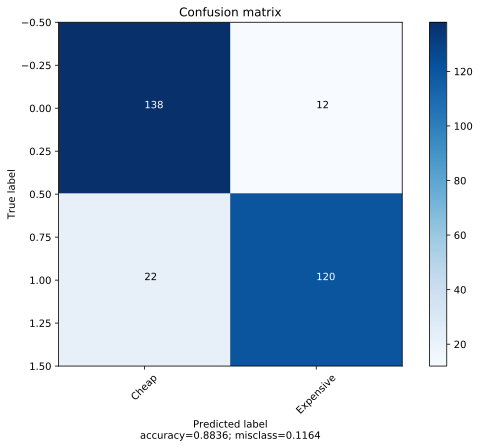

In [143]:
plot_confusion_matrix(cm, target_names)



### F1-Score

Média harmônica entre precision e recall

$F_1 = 2 * \frac{precision*recall}{precision+recall}$

In [145]:
from sklearn.metrics import f1_score


f1_score(y_test, pred_test)

0.8759124087591241

### ROC-AUC


No caso da regressão logística, como vimos, a saída do nosso classificador é dada como uma **probabilidade**. Nós, **arbitrariamente** usamos um threshold de $0.5$ para definir qual classe uma determinável variável pode pertencer. Então, em algumas situações, **prever uma probabilidade** pode ser mais interessante, uma vez que podemos definir os threshold por nossa conta. Uma métrica interessante quando lidamos com probabilidade é a curva ROC.

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination **threshold is varied**. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.” [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)


<img src="../imgs/roc.png" width="300">

In [155]:
from sklearn.metrics import roc_curve, auc
y_preds = log_reg.predict_proba(X_test) 

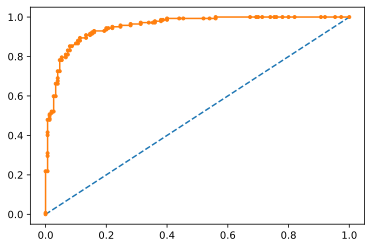

In [162]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds[:,1]) #como sao só duas classes, elas se complementam
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds[:,1]) #como sao só duas classes, elas se complementam
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve. By computing the area under the roc curve, the curve information is summarized in one number

In [176]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_preds[:,1])
print('AUC: %.3f' % auc_roc)

AUC: 0.952


Se quisermos trocar os thresholds, vamos ver como nossas métricas são impactadas:

(0, 1)

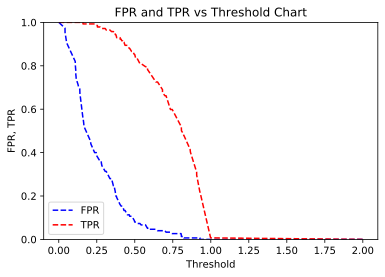

In [170]:
plt.title("FPR and TPR vs Threshold Chart")
plt.plot(thresholds, fpr, "b--", label="FPR")
plt.plot(thresholds, tpr, "r--", label="TPR")
plt.ylabel("FPR, TPR")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

### AUC-PR

Quando temos dados mais desbalanceados, uma métrica também usada é a relação entre **precision e recall** e AUC. De maneira muito similar ao AUC-ROC, temos:


In [177]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, y_preds[:,1])

Average precision-recall score: 0.95


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

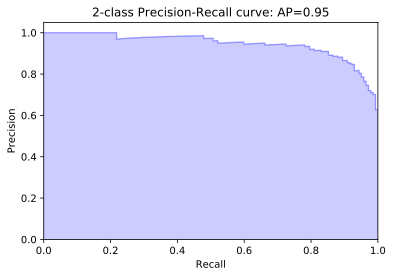

In [183]:
from inspect import signature
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [180]:
# calculate precision-recall AUC
auc_pr = auc(recall, precision)
print('AUC: %.3f' % auc_pr)

AUC: 0.946


# Wise

![](https://media.giphy.com/media/Ulk8kTg0udVcY/giphy.gif)

Você está quase lá, força jovem :) Nessa jornada de hoje nós já aprendemos

- Fazer uma análise crítica dos dados
- Lidar com problemas de Regressão
- Transformar features
- Avaliar a qualidade de um modelo de regressão
- Saber se o treinamento está bom o bastante
- Lidar com problemas de Classificação
- Avaliar a qualidade de um modelo de Classificação


Apesar de todas essas sopa de letrinhas, nós vimos apenas um tipo de modelo, que são os **modelos lineares**. Modelos **lineares** tentam **linearizar** (ou seja, formar uma reta, dependendo da dimensão) que resumam bem os dados. No **Aprendizado Surpervisionado em Machine Learning** em geral existem duas "categorias" de modelos (e uma infinidade de modelos em cada uma das categorias), são os **lineares** e os **não lineares**